# Starting Value Estimate
The simplest aspect of the network to learn would be assessing winning chances based on Elo from the starting position. That is, since everything else is constant at the starting position, we would expect the player with the higher elo to be favored by the value portion.

In [1]:
from keras.models import load_model
import chess

from game_parser import ChessPositionParser
from position_analyzer import ChessPositionAnalyzer

import config

Using Theano backend.


In [2]:
# Initialize the configuration
cfg = config.Config()

# Load up the trained model
model = load_model(cfg.resources.best_model_path)
labels = cfg.labels

starting_fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [3]:
white_elo = 3000
black_elo = 1000
time_control = '3600+30'

cpp = ChessPositionParser(cfg)
cpa = ChessPositionAnalyzer(cpp, model, labels, fen=starting_fen, 
                            white_elo=white_elo, black_elo=black_elo, time_control=time_control)


policy, value = cpa.analyze()

value

0.30989844

In [4]:
policy, value = cpa.reset(white_elo=1000, black_elo=3000).analyze()
value

0.18647608

In [5]:
policy, value = cpa.reset(white_elo=1500, black_elo=1500).analyze()
value

0.250305

In [6]:
policy

,Move,Probability
1807,h2h3,0.099252
1565,g2g3,0.083887
1300,f2f3,0.074619
247,b2b3,0.067597
494,c2c3,0.067503
1808,h2h4,0.065859
28,a2a3,0.065567
1301,f2f4,0.064894
29,a2a4,0.059605
1566,g2g4,0.059242


# Obvious Moves
Mate in 1, capturing a hanging queen, etc. See how well the policy predicts obvious moves that even a low rated player would make.

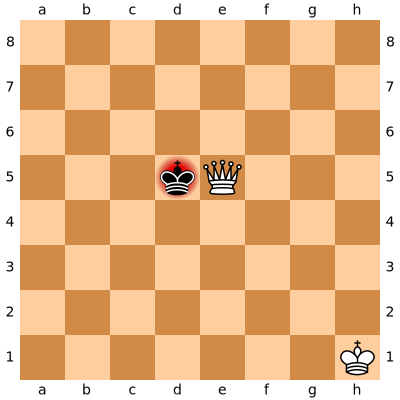

In [7]:
fen = '8/8/8/3kQ3/8/8/8/7K b - - 0 1'
cpa.reset(fen=fen, white_elo=3000, black_elo=3000)
cpa.board()

In [8]:
policy, value = cpa.analyze()
policy

,Move,Probability
859,d5c4,0.386666
861,d5c6,0.447742
872,d5e5,0.165592
